In [1]:
#读取数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文
plt.rcParams['axes.unicode_minus']=False  #正常显示负号
%matplotlib inline

import seaborn as sns
df_train = pd.read_csv('E:/浏览器下载/sales/sales_train.csv', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
df_test = pd.read_csv('E:/浏览器下载/sales/test.csv')
df_shops = pd.read_csv('E:/浏览器下载/sales/shops.csv')
df_items = pd.read_csv('E:/浏览器下载/sales/items.csv')
df_item_categories = pd.read_csv('E:/浏览器下载/sales/item_categories.csv')


In [2]:
#查看训练集
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [3]:
#查看测试集
df_test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [4]:
#查看商店表前8行
df_shops.head(8)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7


In [5]:
#查看商品集前8
df_items.head(8)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40


In [6]:
#查看商品类别
df_item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
#查看训练集的数据类型
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [8]:
#检查各个表是否有缺失值
print("df_train各列缺失值数量:", df_train.isnull().sum())
print("df_test各列缺失值数量 :", df_test.isnull().sum())
print("df_items各列缺失值数量 :", df_items.isnull().sum())
print("df_shops各列缺失值数量:", df_shops.isnull().sum())
print("df_item_categories各列缺失值数量 :", df_item_categories.isnull().sum())

df_train各列缺失值数量: date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
df_test各列缺失值数量 : ID         0
shop_id    0
item_id    0
dtype: int64
df_items各列缺失值数量 : item_name           0
item_id             0
item_category_id    0
dtype: int64
df_shops各列缺失值数量: shop_name    0
shop_id      0
dtype: int64
df_item_categories各列缺失值数量 : item_category_name    0
item_category_id      0
dtype: int64


In [9]:
print("df_train重复值数量:", df_train.duplicated().sum())
print("df_test重复值数量 :", df_test.duplicated().sum())
print("df_items重复值数量 :", df_items.duplicated().sum())
print("df_shops重复值数量:", df_shops.duplicated().sum())
print("df_item_categories重复值数量 :", df_item_categories.duplicated().sum())

df_train重复值数量: 6
df_test重复值数量 : 0
df_items重复值数量 : 0
df_shops重复值数量: 0
df_item_categories重复值数量 : 0


In [10]:
#删除重复值
df_train=df_train.drop_duplicates()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935843 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 156.8 MB


<AxesSubplot:>

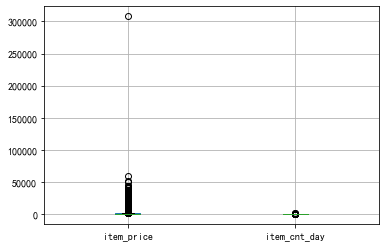

In [11]:
#利用箱型图检查异常值
df_train.boxplot(column=['item_price','item_cnt_day'])

In [12]:
#可以看得出来，有一个点非常偏离，所以我们要删除异常值
df_train = df_train[df_train['item_cnt_day']<1000]
df_train = df_train[(df_train.item_price>0) & (df_train.item_price<300000)]

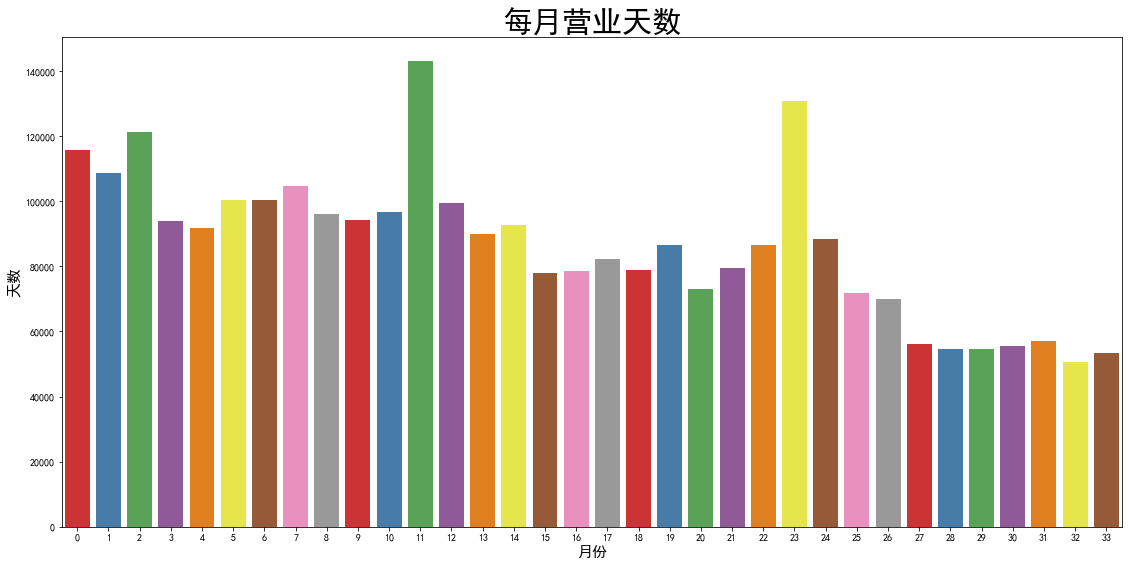

In [13]:
#查看每月营业的情况
plt.rcParams['figure.figsize'] = (19, 9)

sns.countplot(x=df_train['date_block_num'],palette="Set1")
plt.title('每月营业天数', fontsize = 30)
plt.xlabel('月份', fontsize = 15)
plt.ylabel('天数', fontsize = 15)
plt.show()


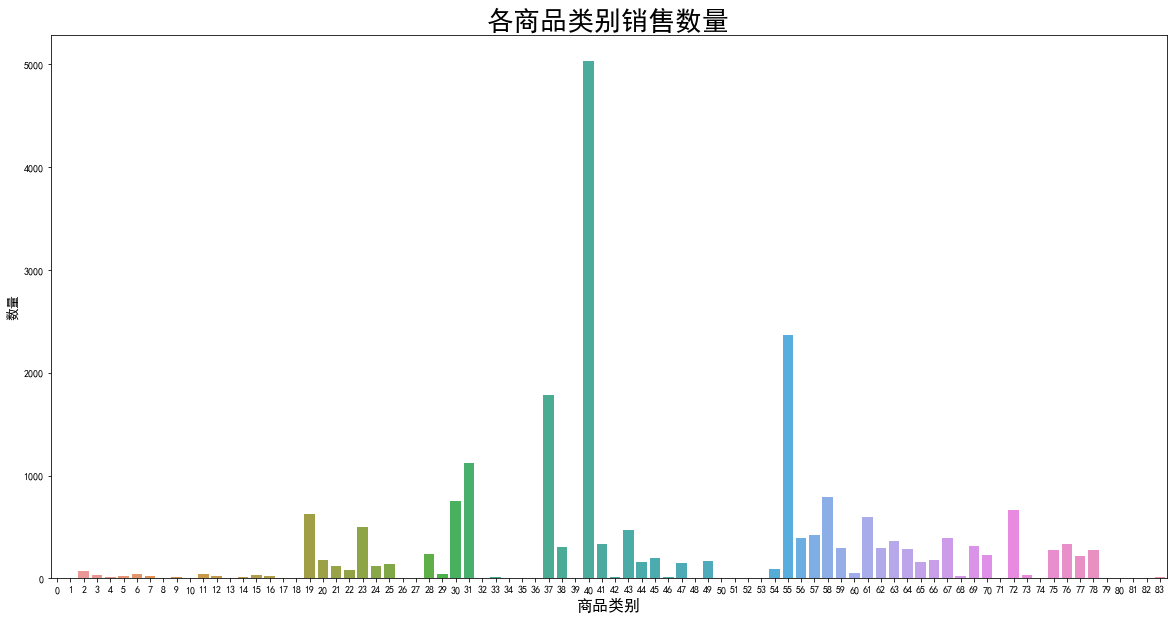

In [14]:
#查看不同商品类别的数量

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x=df_items['item_category_id'])
plt.title('各商品类别销售数量', fontsize = 27)
plt.xlabel('商品类别', fontsize = 16)
plt.ylabel('数量', fontsize = 13)
plt.show()

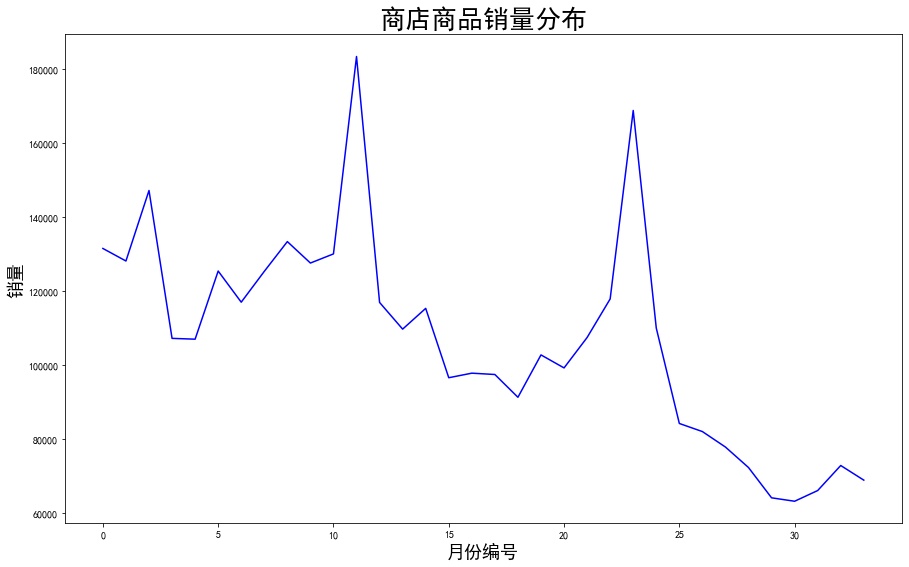

In [15]:
#销量
plt.rcParams['figure.figsize'] = (15, 9)
plt.plot(df_train.groupby('date_block_num').agg({'item_cnt_day':sum}),color = 'blue')
plt.title('商店商品销量分布', fontsize = 26)
plt.xlabel('月份编号', fontsize = 18)
plt.ylabel('销量', fontsize = 18)
plt.show()

In [16]:
#添加四列，年月周日
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['week'] = df_train['date'].dt.isocalendar().week
df_train['day'] = df_train['date'].dt.day
df_train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'year', 'month', 'week', 'day'],
      dtype='object')

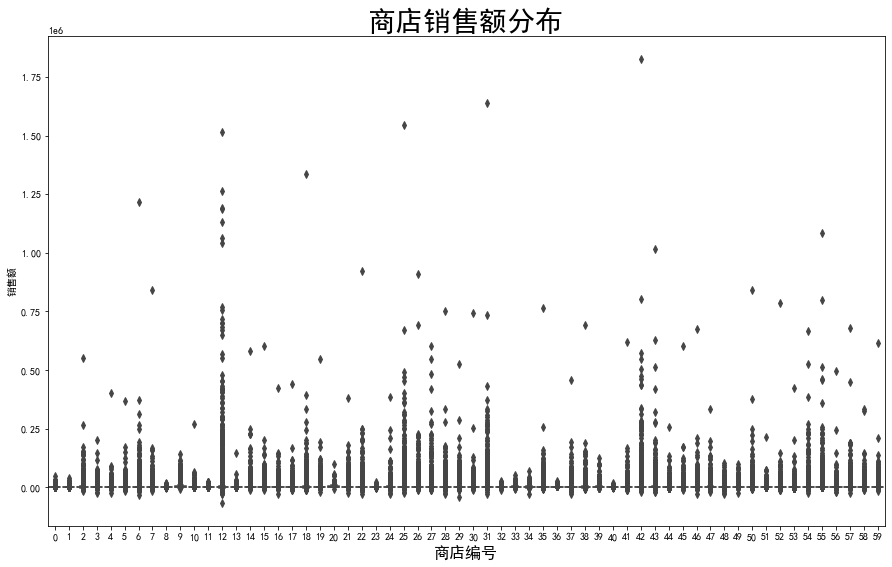

In [18]:
#特征工程
#查看销售额的分布情况
df_train['sales'] = df_train['item_price'] * df_train['item_cnt_day']

sns.boxplot(x = df_train['shop_id'], y = df_train['sales'])
plt.title('商店销售额分布', fontsize = 28)
plt.xlabel('商店编号', fontsize = 16)
plt.ylabel('销售额')
plt.show()

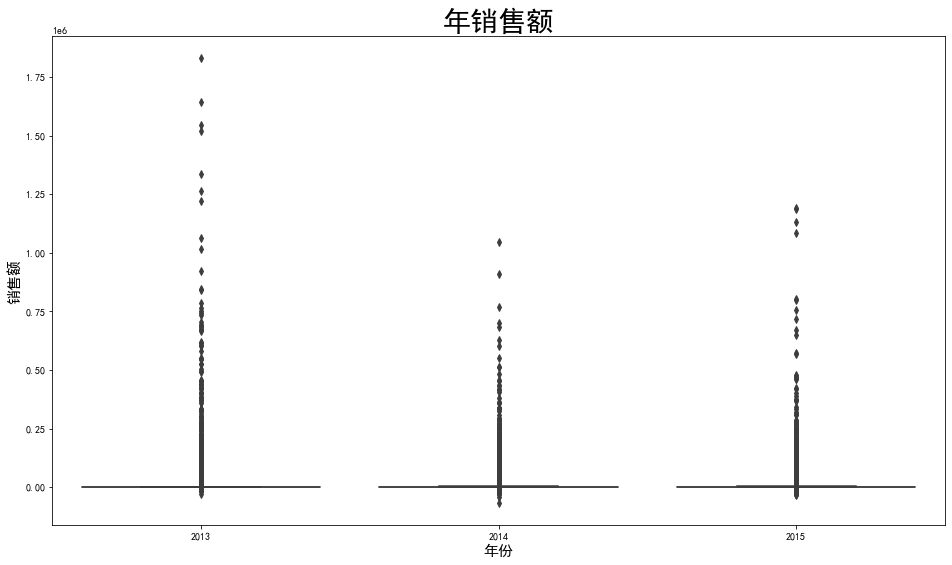

In [19]:
#年销售额
plt.rcParams['figure.figsize'] = (16, 9)
sns.boxplot(x=df_train['year'], y=df_train['sales'])
plt.title('年销售额', fontsize = 28)
plt.xlabel('年份', fontsize = 15)
plt.ylabel('销售额', fontsize = 15)
plt.show()


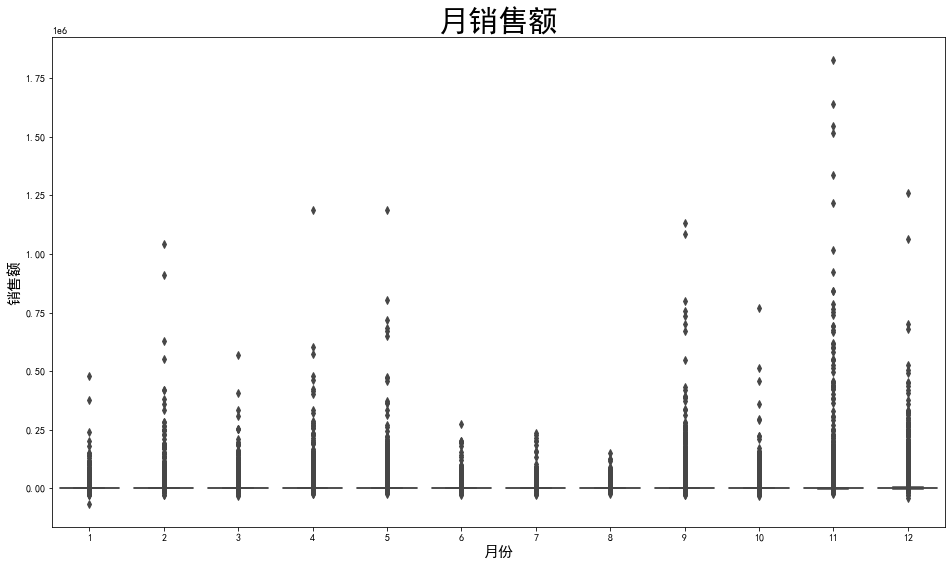

In [20]:
#每月销售额
plt.rcParams['figure.figsize'] = (16, 9)
sns.boxplot(x = df_train['month'], y = df_train['sales'])
plt.title('月销售额', fontsize = 30)
plt.xlabel('月份', fontsize = 15)
plt.ylabel('销售额', fontsize = 15)
plt.show()

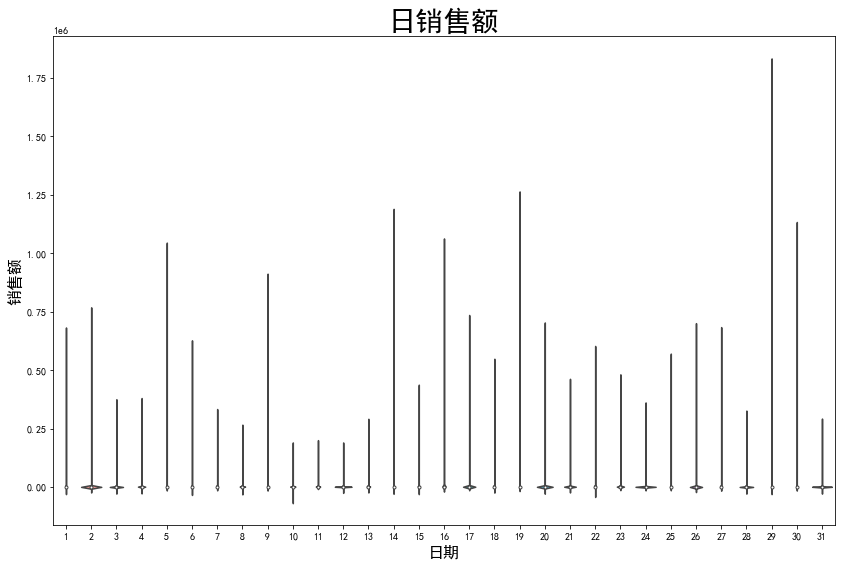

In [21]:
#查看每天的销售额
plt.rcParams['figure.figsize'] = (14, 9)
sns.violinplot(x = df_train['day'], y = df_train['sales'])
plt.title('日销售额', fontsize = 28)
plt.xlabel('日期', fontsize = 16)
plt.ylabel('销售额', fontsize = 16)
plt.show()

In [22]:
#因为我们要预测的是月销售额，所以要按月来创建数据集，添加主要属性到这个数据集里
data_m = df_train.groupby([df_train['date'].apply(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()
data_m = data_m[['date','item_id','shop_id','item_cnt_day']]
data_m = data_m.pivot_table(index=['item_id','shop_id'], columns = 'date', values = 'item_cnt_day', fill_value = 0).reset_index()
data_m

date,item_id,shop_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,55,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424118,22168,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424119,22168,16,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424120,22168,42,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424121,22168,43,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#准备测试数据
df_test = pd.merge(df_test, data_m, on = ['item_id', 'shop_id'], how = 'left')
df_test.fillna(0, inplace = True)
df_test

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,214196,45,16188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,214197,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,214198,45,19648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#创建训练数据，删除没用的列
X_train = df_test.drop(['2015-10', 'item_id', 'shop_id'], axis = 1)
y_train = df_test['2015-10']
x_test = df_test.drop(['2013-01', 'item_id', 'shop_id'], axis = 1)
X_train



,ID,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
214196,214196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,214197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,214198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#分出训练集和测试集，同时测试集占20%
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
x_train

,ID,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
142555,142555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188449,188449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180476,180476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36421,36421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,176963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117952,117952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173685,173685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
43567,43567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#建立模型，这里我们采用LGBMRegreessor接口，导入相关库，
import lightgbm as lgb
from lightgbm import LGBMRegressor 


model_lgb = LGBMRegressor( n_estimators=200,#数的数量
                           learning_rate=0.03,#学习率
                           num_leaves=32,#每棵树的最多叶子数
                           colsample_bytree=0.9497036,#特征随机采样的比例
                           subsample=0.8715623,#指定采样出 subsample * n_samples 个样本用于训练弱学习器
                           max_depth=8,#每棵树的最大深度，防止过拟合
                           reg_alpha=0.04,#L1正则化参数
                           reg_lambda=0.073,#L2正则化参数
                           min_split_gain=0.0222415,#定叶节点进行分支所需的损失减少的最小值
                           min_child_weight=40)#指定孩子节点中最小的样本权重和


LGBMRegressor(colsample_bytree=0.9497036, learning_rate=0.03, max_depth=8,
              min_child_weight=40, min_split_gain=0.0222415, n_estimators=200,
              num_leaves=32, reg_alpha=0.04, reg_lambda=0.073,
              subsample=0.8715623)

In [ ]:
#训练模型
model_lgb.fit(x_train, y_train)


In [47]:
# 模型评估
from sklearn.metrics import mean_squared_error
y_pred_lgb = model_lgb.predict(x_valid)

preds = pd.DataFrame(y_pred_lgb, columns=['item_cnt_month'])

print('预测的均方根为:', mean_squared_error(y_valid, y_pred_lgb) ** 0.5)

预测的均方根为: 2.204129878618847


<Figure size 864x432 with 0 Axes>

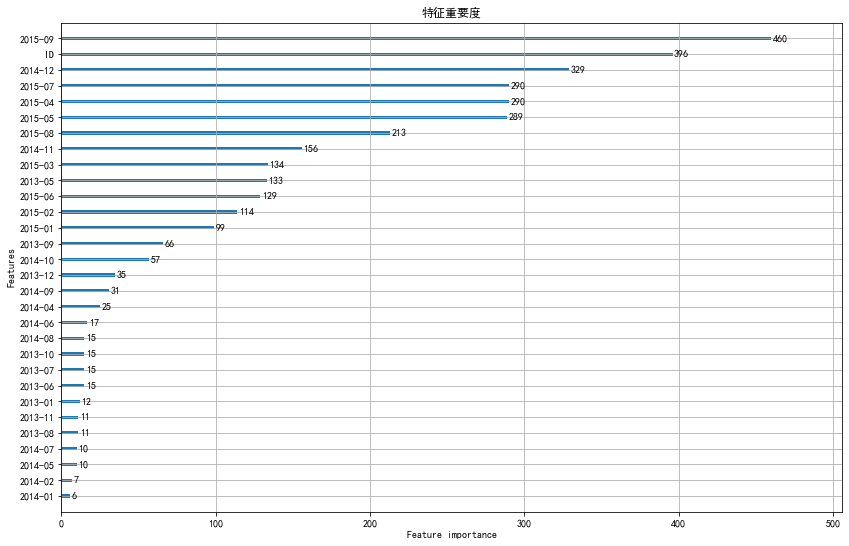

In [48]:
# 特征重要度
plt.figure(figsize=(12,6))
lgb.plot_importance(model_lgb, max_num_features=30)
plt.title("特征重要度")
plt.show()

In [50]:
# 网格搜索，参数优化
from sklearn.model_selection import GridSearchCV
estimator = LGBMRegressor(num_leaves=31)
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}
model_lgb= GridSearchCV(estimator, param_grid)
model_lgb.fit(x_train, y_train)
print('通过网格搜索找到的最佳参数是:', model_lgb.best_params_)

通过网格搜索找到的最佳参数是: {'learning_rate': 0.1, 'n_estimators': 20}


In [54]:
#模型预测
lgb_y_pred = model_lgb.predict(x_test)
lgb_y_pred = model_lgb.predict(x_test).clip(0., 20.)
pred = pd.DataFrame(lgb_y_pred, columns=['item_cnt_month'])

In [55]:
#查看结果
pred

,item_cnt_month
0,0.442773
1,0.148036
2,0.759886
3,0.177496
4,0.148036
...,...
214195,0.278194
214196,0.124950
214197,0.124950
214198,0.124950


In [56]:
#写入文件
pred.to_csv('E:/浏览器下载/sales/submission.csv',index_label='ID')